In [1]:
%load_ext autoreload
%autoreload

import torch
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
from utils.vis import *
from utils.data import *
from model import PoseModel
from transform import *
from dataset import PlanktonDataset
import cPickle as pickle
import numpy as np
import glob
from scipy.spatial.distance import euclidean
from eval import *
from dataset import DatasetWrapper

%matplotlib inline

os.environ["CUDA_VISIBLE_DEVICES"] = str(0)

eval.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/site-packages/ipykernel/kernelapp

In [2]:
print 'Loading model ...'
dataset_id = 1
modelName = RESNET50
modelRoot = '/data6/zzuberi/plankton_wi17/pose/poseprediction_torch/records'
model = PoseModel(modelName)
# model = nn.DataParallel(model)  #TODO modify for AlexNet
model = model.cuda()
#checkpoints = torch.load(modelRoot + '/{}/'.format('resnet50_pose') + str(dataset_id) + '/checkpoints/checkpoint-15.pth.tar')
checkpoints = torch.load('/data3/ludi/plankton_wi17/pose/poseprediction_torch/best_models/resnet50/checkpoints/model_best.pth.tar')
model.load_state_dict(checkpoints['state_dict'])

Loading model ...


In [3]:
img_dir = '/data5/Plankton_wi18/rawcolor_db/images'
data = '/data5/lekevin/plankton/poseprediction/poseprediction_torch/data/3/'

csv_filename = os.path.join(data, 'data_{}_%d.csv' % dataset_id)

phases = ['train', 'test']

# dataset_mean, dataset_std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
normalize = Normalize([0.5, 0.5, 0.5], [1, 1, 1])

batch_size = 16

input_size = 384

# data_transform = {
#     'train': transforms.Compose([
#         Rescale(input_size),
#         RandomHorizontalFlip(),
#         RandomVerticalFlip(),
#         ToTensor(),
#         normalize
#     ]),
#     'valid': transforms.Compose([
#         Rescale(input_size),
#         ToTensor(),
#         normalize
#     ]),
#     'test': transforms.Compose([
#         Rescale(input_size),
#         ToTensor(),
#         normalize
#     ])
# }
print 'Loading datasets ...'
datasets = {phase: DatasetWrapper(phase,
                                      csv_filename=csv_filename.format(phase),
                                      img_dir=img_dir,
                                      input_size=(input_size, input_size),
                                      output_size=get_output_size(model, input_size),
                                      batch_size=batch_size,
                                      amp=1,
                                      std=3)
                for phase in phases}

dataset_sizes = {x: len(datasets[x]) for x in phases}

use_gpu = torch.cuda.is_available()

Loading datasets ...


In [21]:
predictions = pickle.load( open( modelRoot + '/{}/'.format('resnet50_pose') + str(dataset_id) + "/predPose.p", "rb" ) )

In [14]:
print(predictions)

[[[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 ...

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]]


In [17]:
predCoordinates = []
nSmpl = datasets[TEST].dataset_size

# Estimate keypoints
for i,data in enumerate(datasets[TEST].dataloader):
    temp = estimateKeyPoints(model, data, True)
    predCoordinates += temp
    if i%100==0:
        print i,'/',nSmpl
predCoordinates = [np.fliplr(i) for i in predCoordinates]   # (y,x) --> (x,y)
predCoordinates = np.asarray(predCoordinates)/48.           # 48x48 coordinates --> relative head&tail coordinates

0 / 9281
100 / 9281
200 / 9281
300 / 9281
400 / 9281
500 / 9281


In [15]:
#predCoordinates = np.asarray(predCoordinates)/48.
print(predCoordinates)

[[[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 ...

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]

 [[0.02083333 0.0625    ]
  [0.02083333 0.        ]
  [0.97916667 0.95833333]]]


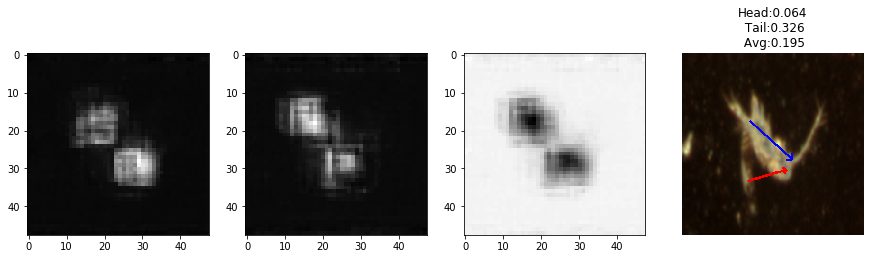

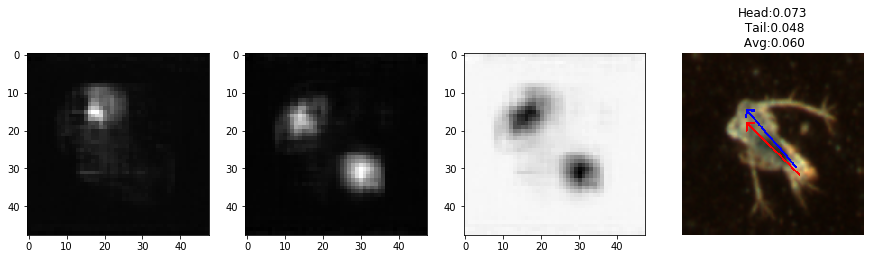

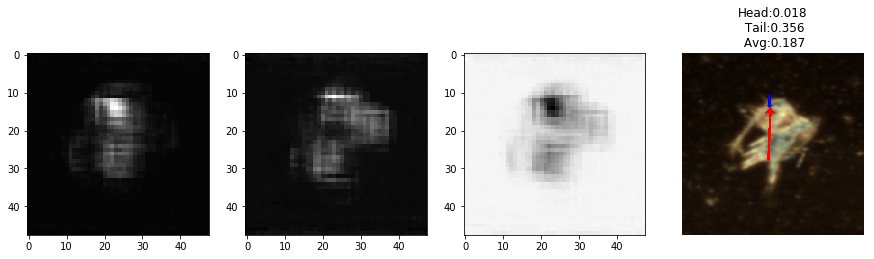

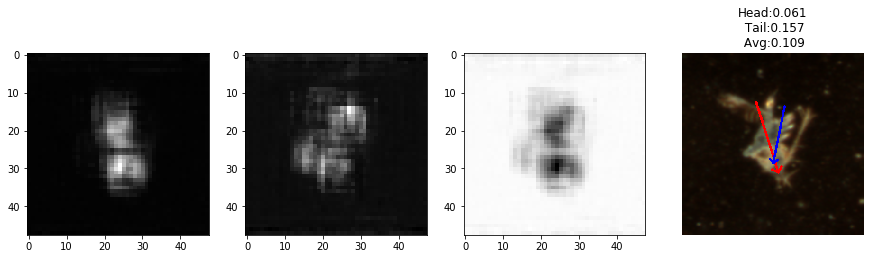

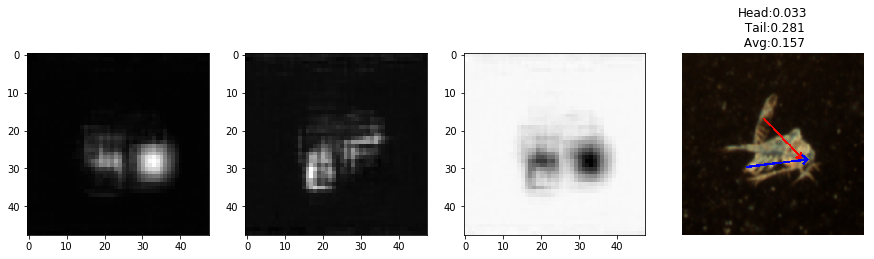

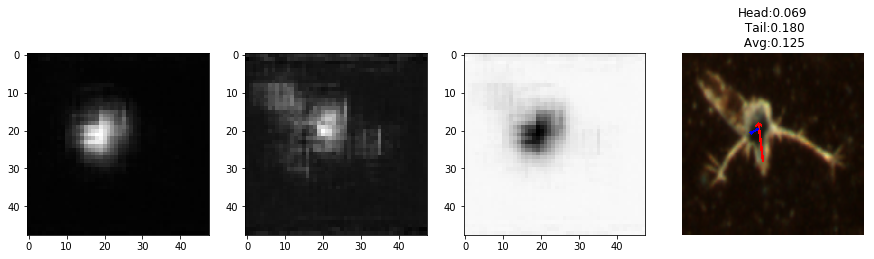

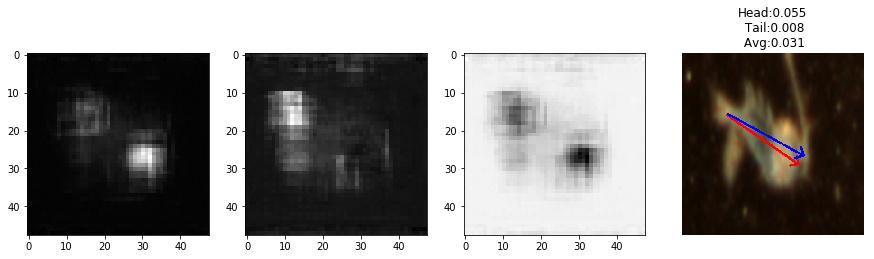

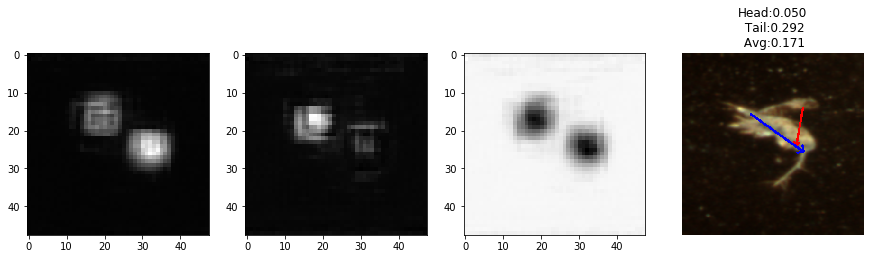

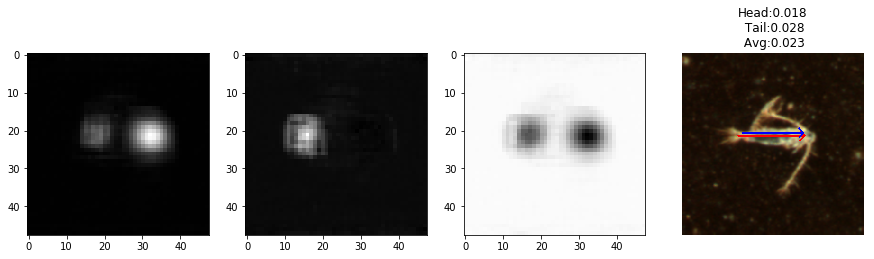

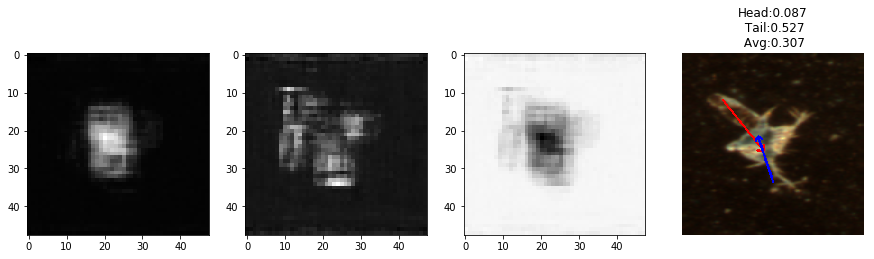

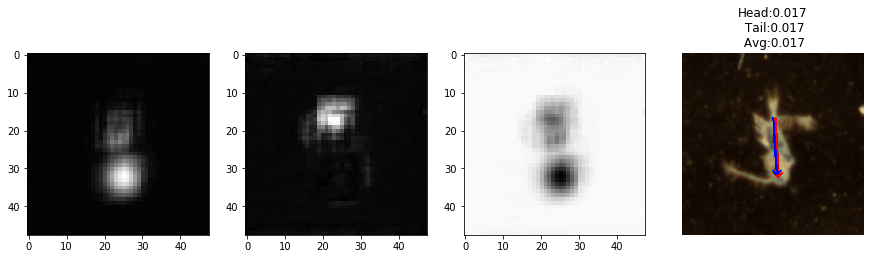

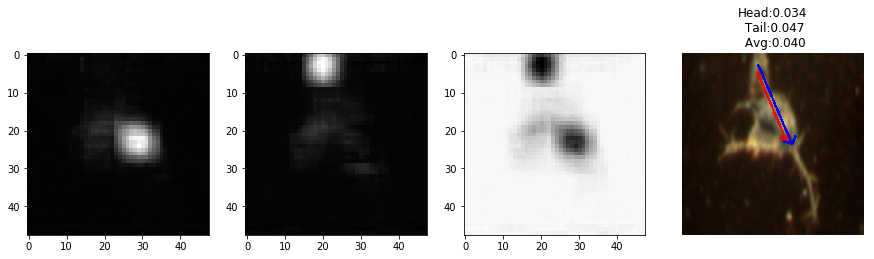

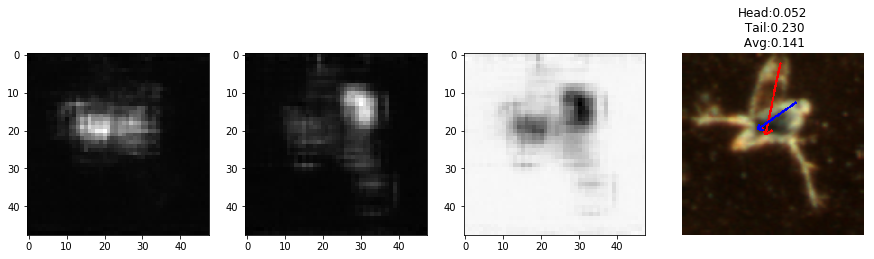

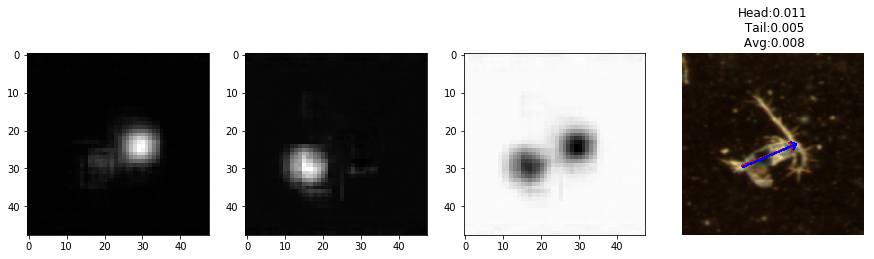

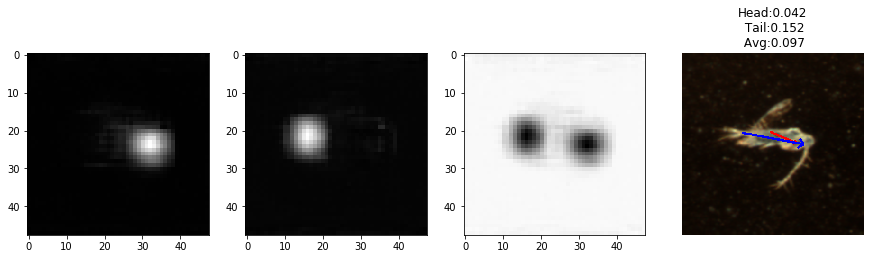

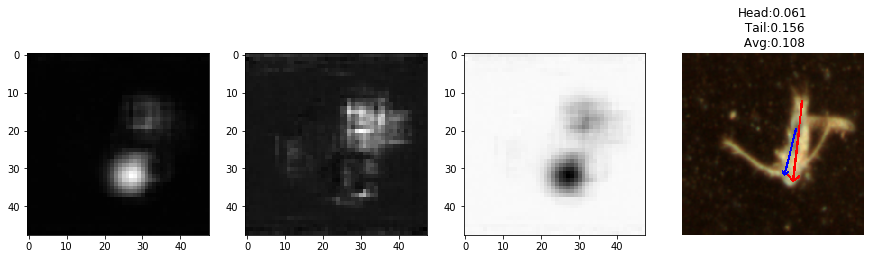

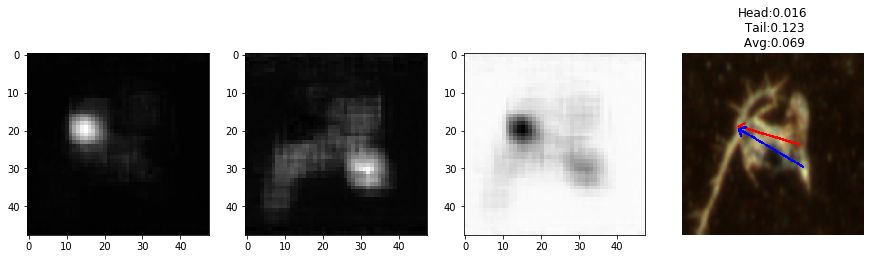

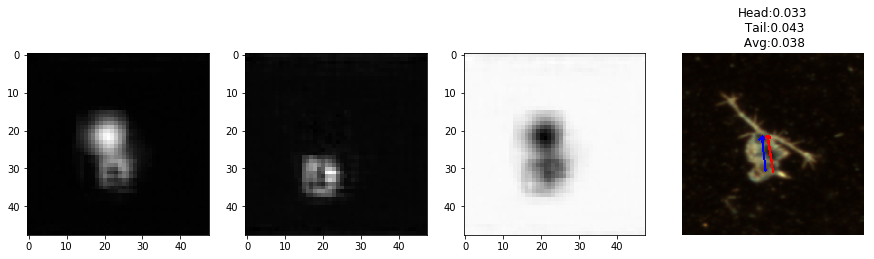

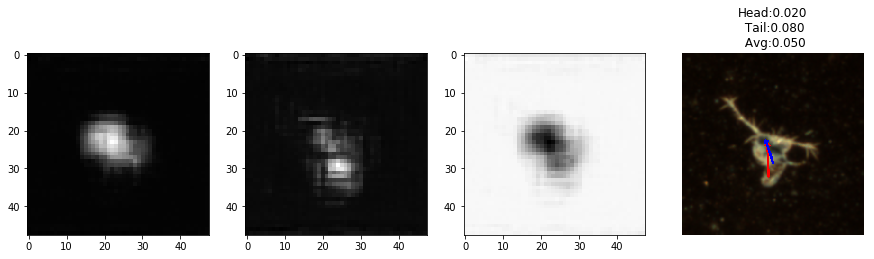

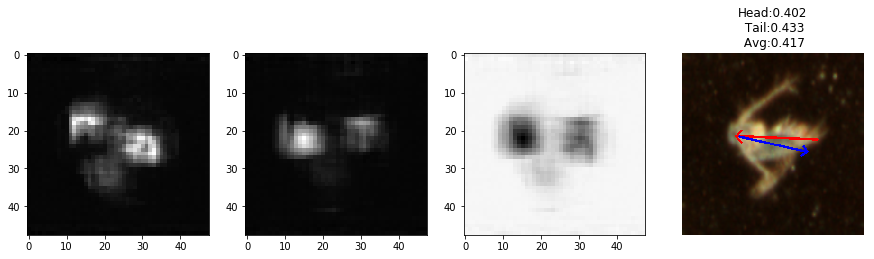

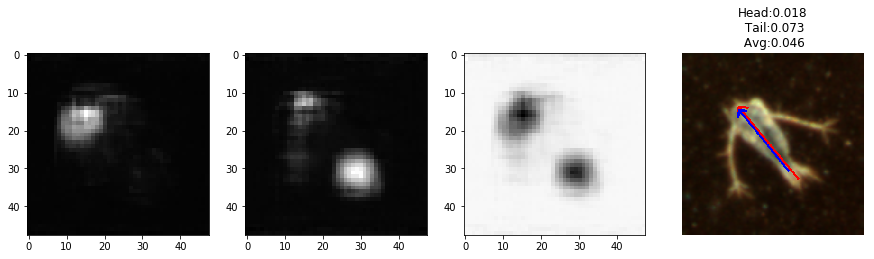

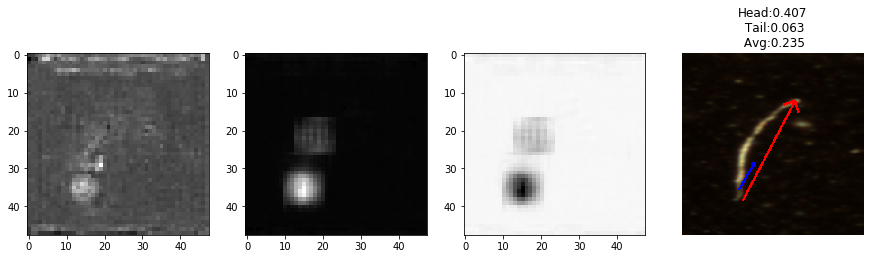

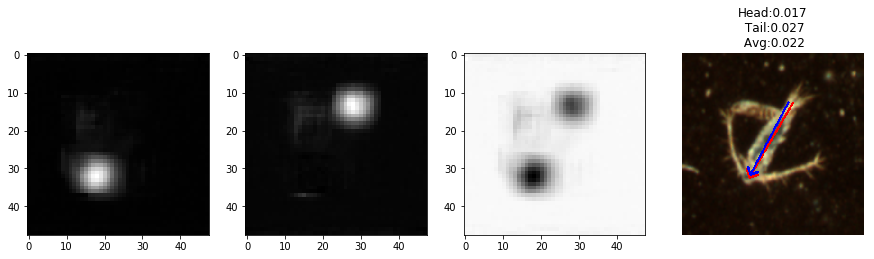

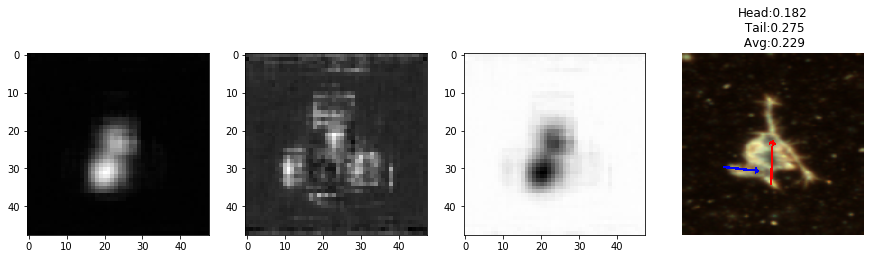

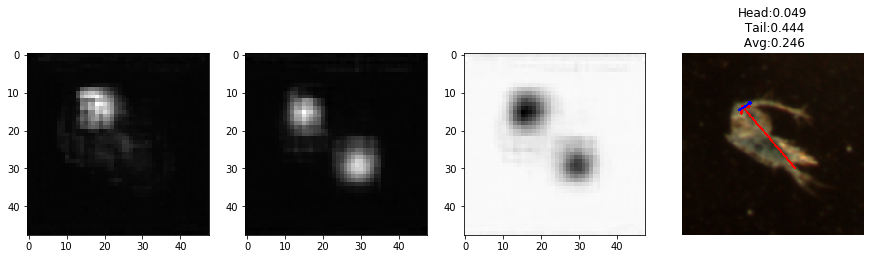

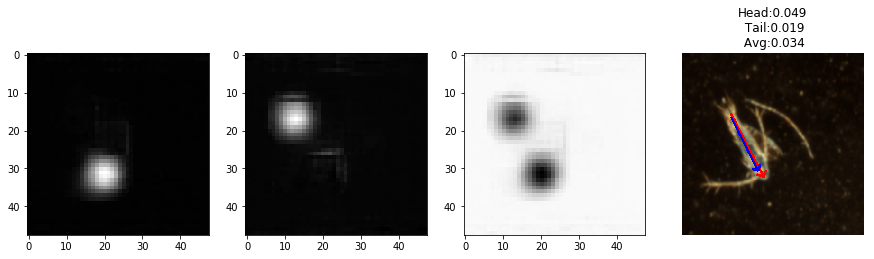

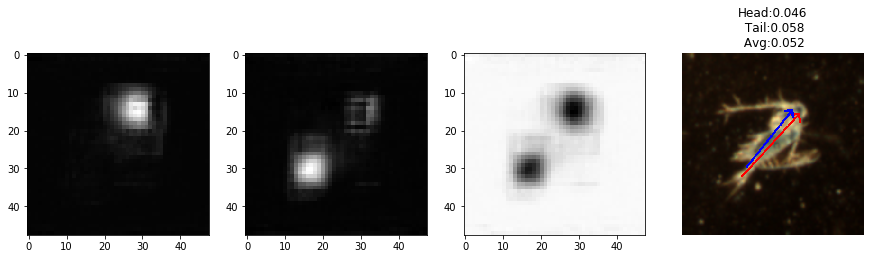

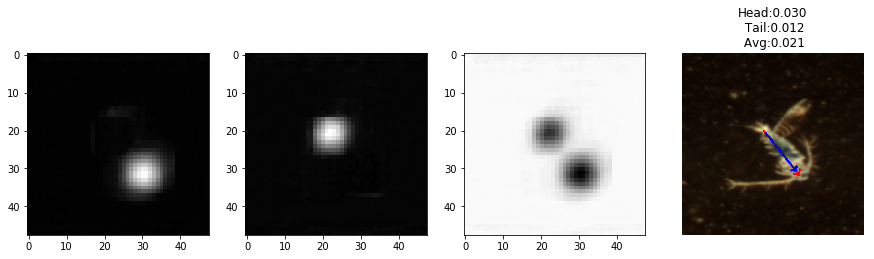

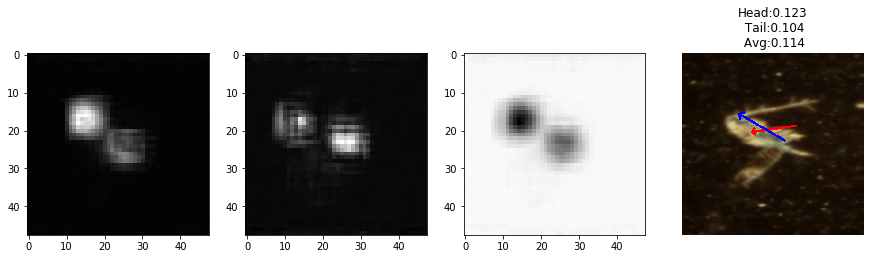

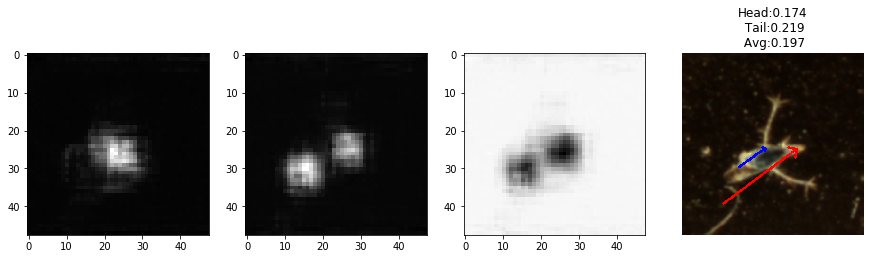

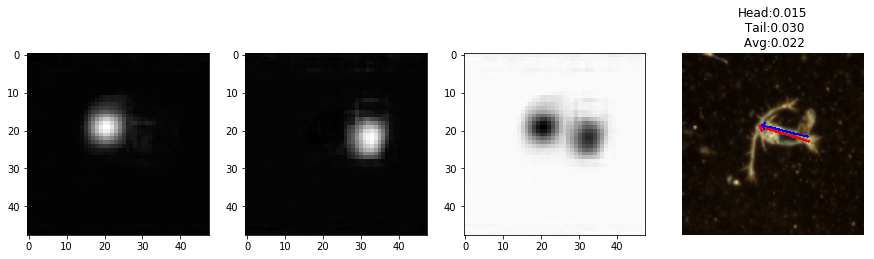

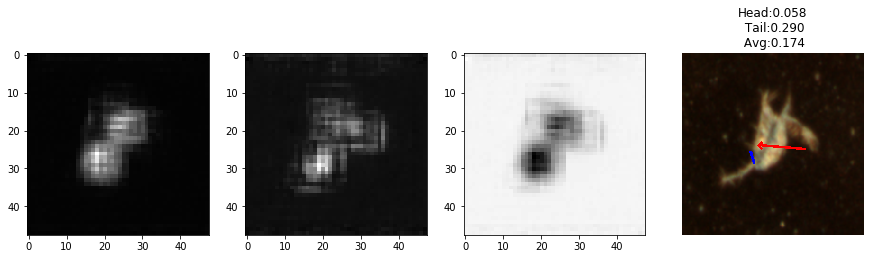

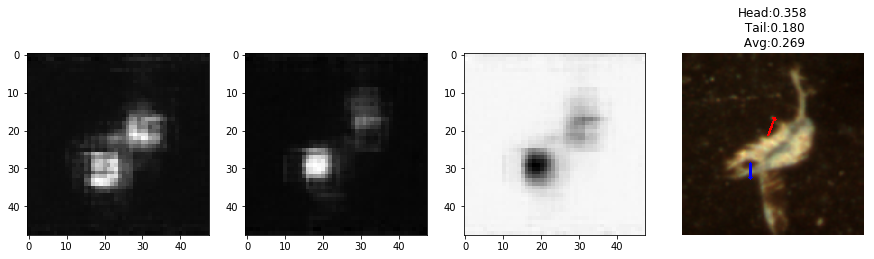

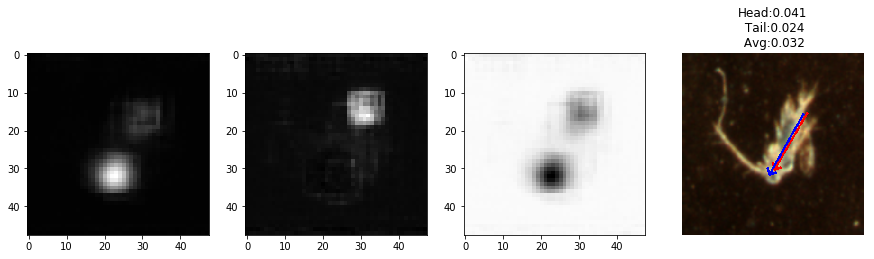

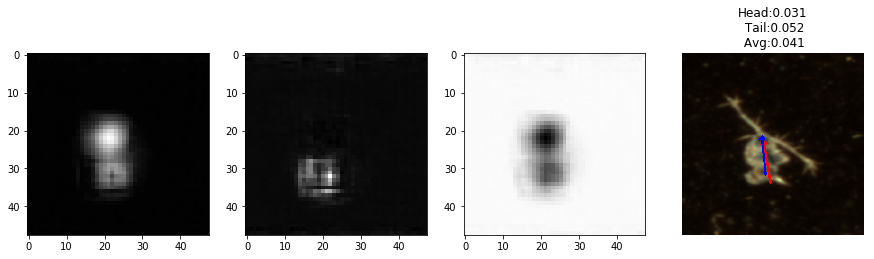

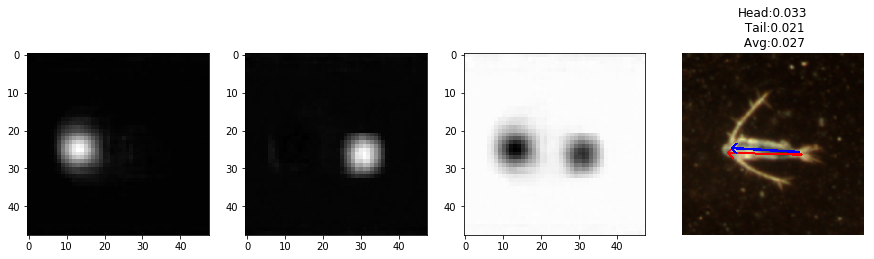

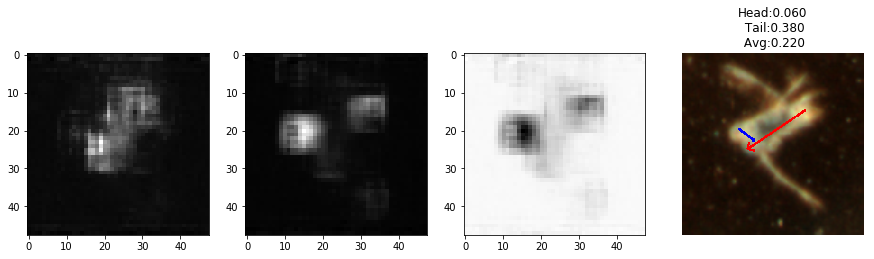

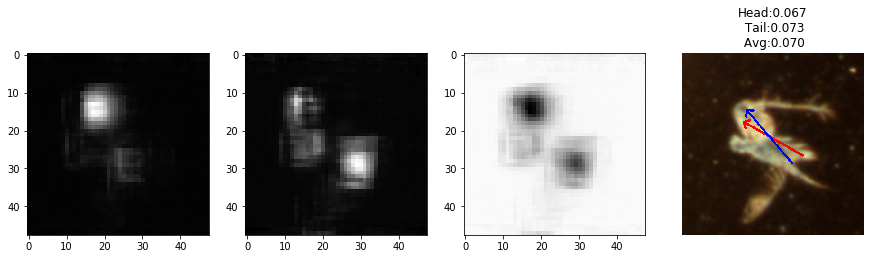

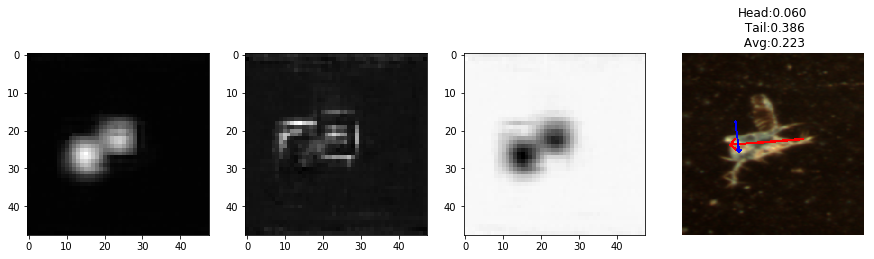

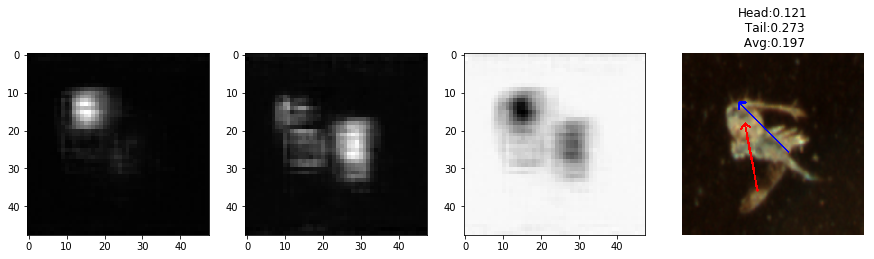

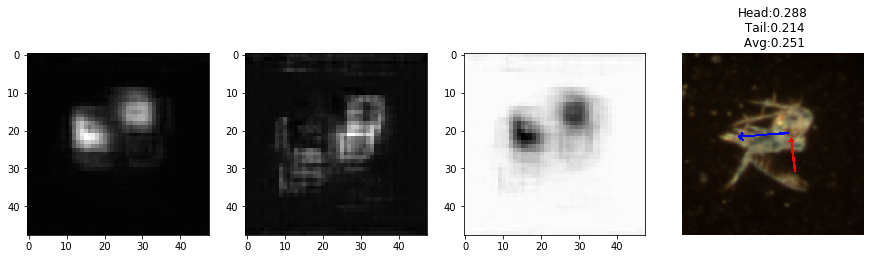

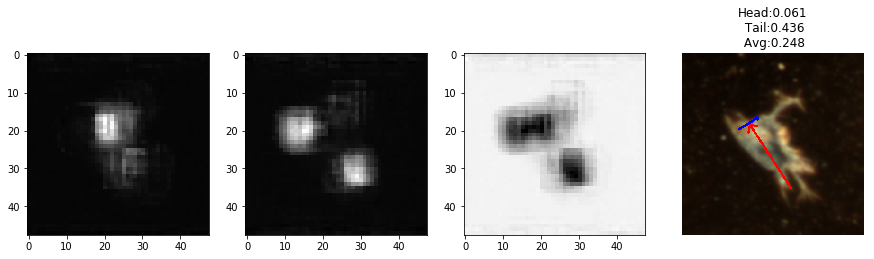

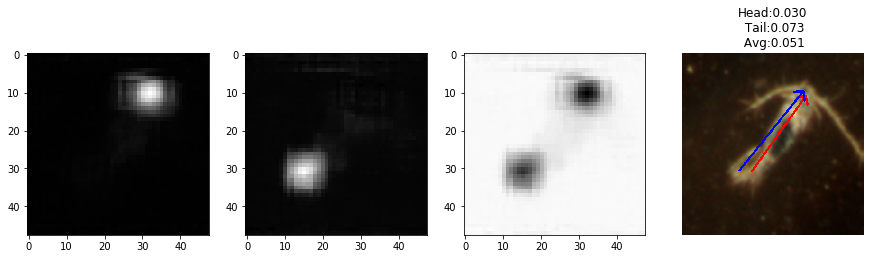

Process Process-4:
Process Process-3:
Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
    self.run()
    self.run()
    self.run()
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/zzuberi/miniconda2/envs/zzuberi/lib/python2.7/

KeyboardInterrupt: 

In [4]:
for j,data in enumerate(datasets[TEST].dataloader):
    model.eval()
    inputs, target, coordinates = data['image'], data['target_map'], data['coordinates']
    
    if True:
        inputs = Variable(inputs.cuda())
        target = Variable(target.cuda())
    else:
        inputs, target = Variable(inputs), Variable(target)
    
    outputs = model(inputs)
    pred_maps = outputs.cpu().data[0].numpy()
    
    fig, axarr = plt.subplots(1,4, figsize=(15,4))
    for i,pred_map in enumerate(pred_maps):
        axarr[i].imshow(pred_map, cmap='gray')
    poseCoords = np.stack([np.unravel_index(p.argmax(), p.shape) for p in pred_maps])/48.
    poseCoords = np.fliplr(poseCoords)

    data0 = normalize.recover(data)
    images = data0['image']
          
    evalShowArrow(images[0], poseCoords, coordinates[0], None)
    

In [ ]:
def euclideanDistance(prediction, gtruthHead, gtruthTail):
    headEuclid, tailEuclid = [], []
    head, tail = 0, 1
    nSmpl = len(prediction)
    for i in range(nSmpl):
        headEuclid.append (euclidean (prediction[i][head], gtruthHead[i]))
        tailEuclid.append (euclidean (prediction[i][tail], gtruthTail[i]))
    headEuclid = np.asarray (headEuclid)
    tailEuclid = np.asarray (tailEuclid)
    histData = {'Head Distribution': headEuclid, 'Tail Distribution': tailEuclid}
    avgHeadEuclid = headEuclid.mean ()
    avgTailEuclid = tailEuclid.mean ()
    avgEuclid = np.array ((avgHeadEuclid, avgTailEuclid)).mean ()
    return {'Head Distance':avgHeadEuclid,
            'Tail Distance':avgTailEuclid,
            'Avg Distance':avgEuclid,
            'Distribution':histData}

def concatCoordinates(headX, headY, tailX, tailY):
    assert headX.shape == headY.shape and tailX.shape == tailY.shape
    headXY = np.column_stack ((headX, headY))
    tailXY = np.column_stack ((tailX, tailY))
    poseXY = np.stack([headX - tailX, headY - tailY], axis=1)
    return headXY, tailXY, poseXY

In [6]:
poseFile = '/data3/ludi/plankton_wi17/pose/poseprediction_torch/best_models/resnet50/predPose.p'
predCoordinates = pickle.load(open(poseFile, "rb"))
# predCoordinates = np.asarray([np.fliplr(i) for i in temp_predCoordinates]) # (y,x) --> (x,y)

# taxLvl Datasets Order --> Specimen, Genus, Family, Order, Dataset
# Initialize pose & classes - Test Data
headX, headY = datasets['test'].data['head_x_rel'], datasets['test'].data['head_y_rel']
tailX, tailY =  datasets['test'].data['tail_x_rel'], datasets['test'].data['tail_y_rel']
gtruthHead, gtruthTail, poseTestSet = concatCoordinates(headX, headY, tailX, tailY)
testTaxLvlDatasets, testspecimenIDs = group_specimen2class(datasets['test'].data['images'])

# Initialize pose & classes - Train Data
headX, headY = datasets['train'].data['head_x_rel'], datasets['train'].data['head_y_rel']
tailX, tailY =  datasets['train'].data['tail_x_rel'], datasets['train'].data['tail_y_rel']
__, __, poseTrainSet = concatCoordinates(headX, headY, tailX, tailY)
trainTaxLvlDatasets, trainspecimenIDs = group_specimen2class(datasets['train'].data['images'])

# Entire Dataset Evaluation

In [14]:
classMetrics, classMetrics_idx = {}, {}
for cls in testTaxLvlDatasets['Dataset']:
    # Gather images of each class by their indices from dataset
    trainIdx = [i for i, spc in enumerate(trainspecimenIDs) if spc in trainTaxLvlDatasets['Dataset'][cls]]
    testIdx = [i for i, spc in enumerate(testspecimenIDs) if spc in testTaxLvlDatasets['Dataset'][cls]]

    # Compute metrics
    metrics = {}
    metrics['Euclid'] = euclideanDistance (predCoordinates[testIdx], gtruthHead[testIdx], gtruthTail[testIdx])
    metrics['PoseVar'] = pose_variability2(poseTrainSet[trainIdx], [trainspecimenIDs[i] for i in trainIdx])
    metrics['KLDiv'] = pose_diff2(poseTrainSet[trainIdx], [trainspecimenIDs[i] for i in trainIdx],
                                       poseTestSet[testIdx], [testspecimenIDs[i] for i in testIdx])
    classMetrics[cls] = metrics

Average Euclidian Distance:  0.08561000405370575


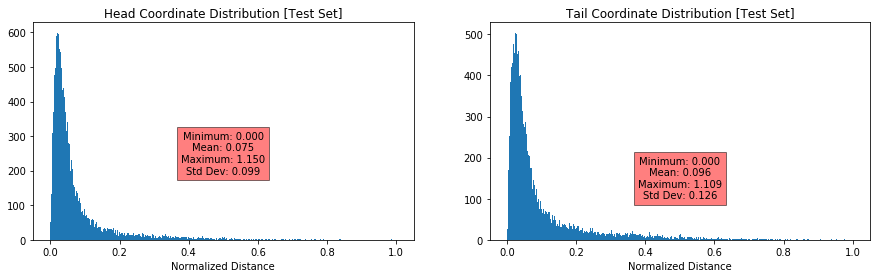

In [15]:
headEuclid = classMetrics['Dataset']['Euclid']['Distribution']['Head Distribution']
tailEuclid = classMetrics['Dataset']['Euclid']['Distribution']['Tail Distribution']
fig, axarr = plt.subplots(1,2, figsize=(15,4))
hn, hbins, hpatches = axarr[0].hist(headEuclid, 500, range=[0.0, 1.0])
axarr[0].set_xlabel('Normalized Distance')
axarr[0].set_title('Head Coordinate Distribution [Test Set]')
axarr[0].text(0.5,250, 'Minimum: {:0.3f}\nMean: {:0.3f}\nMaximum: {:0.3f}\nStd Dev: {:0.3f}'.format(headEuclid.min(), headEuclid.mean(),
              headEuclid.max(), np.std(headEuclid)),
              bbox=dict(facecolor='red', alpha=0.5),  horizontalalignment='center', verticalalignment='center')

tn, tbins, tpatches = axarr[1].hist(tailEuclid, 500, range=[0.0, 1.0])
axarr[1].set_xlabel('Normalized Distance')
axarr[1].set_title('Tail Coordinate Distribution [Test Set]')
axarr[1].text(0.5,150, 'Minimum: {:0.3f}\nMean: {:0.3f}\nMaximum: {:0.3f}\nStd Dev: {:0.3f}'.format(tailEuclid.min(), tailEuclid.mean(),
              tailEuclid.max(), np.std(tailEuclid)),
              bbox=dict(facecolor='red', alpha=0.5),  horizontalalignment='center', verticalalignment='center')
print 'Average Euclidian Distance: ', 0.5*(headEuclid.mean() + tailEuclid.mean())

# Order Evaluation

In [10]:
print len(testTaxLvlDatasets['Genus'].keys()), 'total classes'
print '2 | ',len([cls for cls in testTaxLvlDatasets['Genus'] if len(set(testTaxLvlDatasets['Genus'][cls])) >= 2])
print '3 | ',[cls for cls in testTaxLvlDatasets['Genus'] if len(set(testTaxLvlDatasets['Genus'][cls])) >= 3]
print '4 | ',len([cls for cls in testTaxLvlDatasets['Genus'] if len(set(testTaxLvlDatasets['Genus'][cls])) >= 4])

print set(testTaxLvlDatasets['Genus']['Mysida (Order)'])

23 total classes
2 |  19
3 |  ['Poecilostomatoida (Family)', 'Centropagidae (Family)', 'Brachyura (Family)', 'Euphausiidae (Family)', 'Gammaridae (Family)', 'Polychaeta (class) (Order)', 'Oithonidae (Family)', 'Acartia', 'Calanoida (Order)', 'Mysida (Order)', 'Candaciidae (Family)', 'Hydromedusae (Order)', 'Acartiidae (Family)']
4 |  10
set(['20170131_002', '20170126_002', '20170130_002'])


### Class Evaluation

In [18]:
classMetrics, classMetrics_idx = {}, {}
lvl = 'Genus'
for cls in testTaxLvlDatasets[lvl]:
    # Gather images of each class by their indices from dataset
    trainIdx = [i for i, spc in enumerate(trainspecimenIDs) if spc in trainTaxLvlDatasets[lvl][cls]]
    testIdx = [i for i, spc in enumerate(testspecimenIDs) if spc in testTaxLvlDatasets[lvl][cls]]

    # Compute metrics
    metrics = {}
    metrics['Euclid'] = euclideanDistance (predCoordinates[testIdx], gtruthHead[testIdx], gtruthTail[testIdx])
    metrics['PoseVar'] = pose_variability2(poseTrainSet[trainIdx], [trainspecimenIDs[i] for i in trainIdx])
    metrics['KLDiv'] = pose_diff2(poseTrainSet[trainIdx], [trainspecimenIDs[i] for i in trainIdx],
                                       poseTestSet[testIdx], [testspecimenIDs[i] for i in testIdx])
    classMetrics[cls] = metrics
    classMetrics_idx[cls] = testIdx

/home/plankton/miniconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


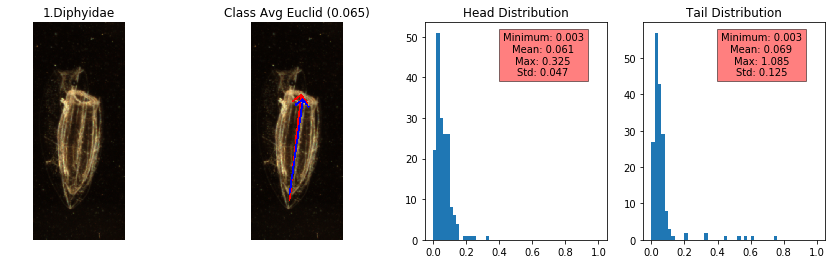

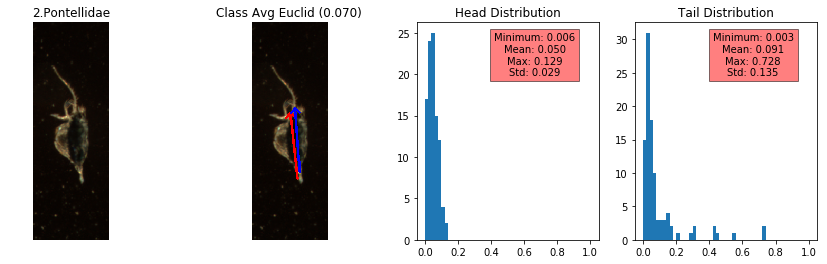

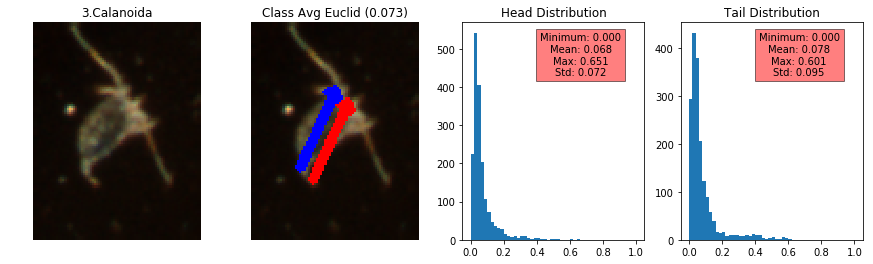

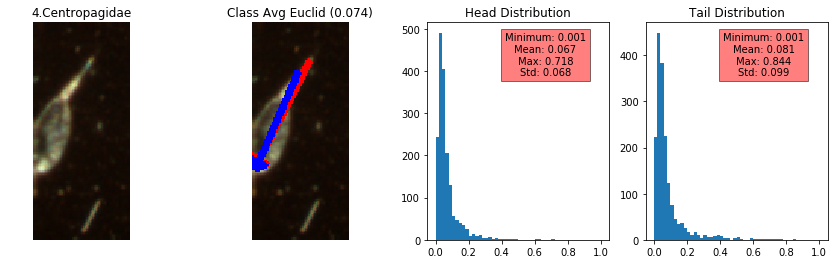

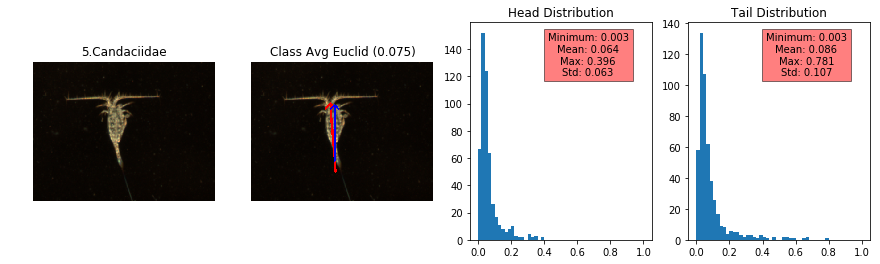

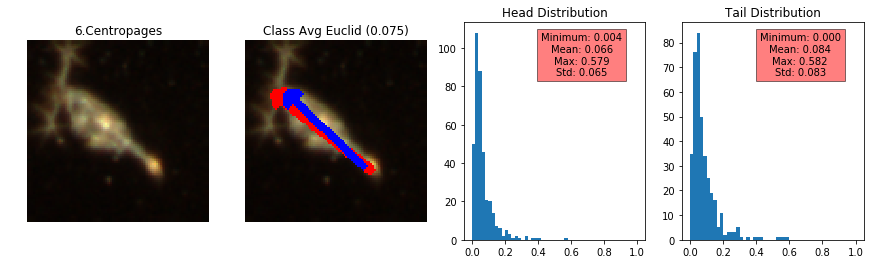

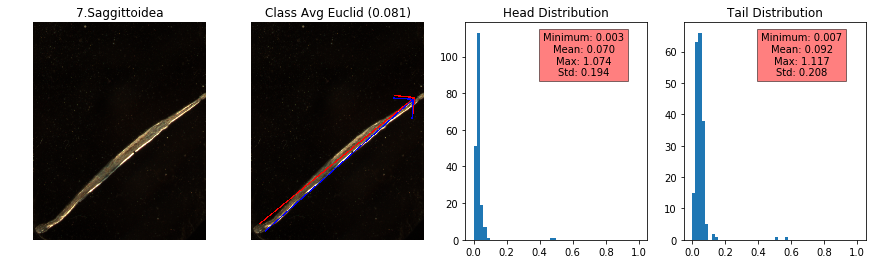

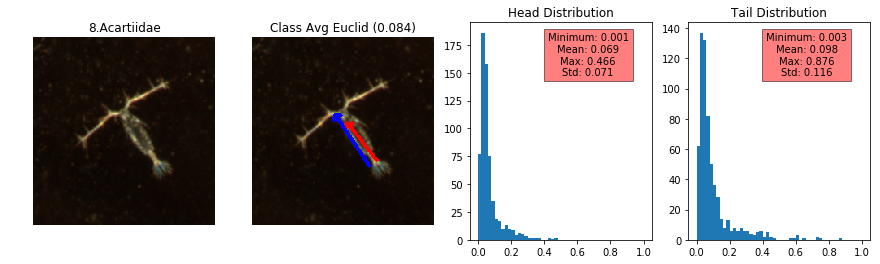

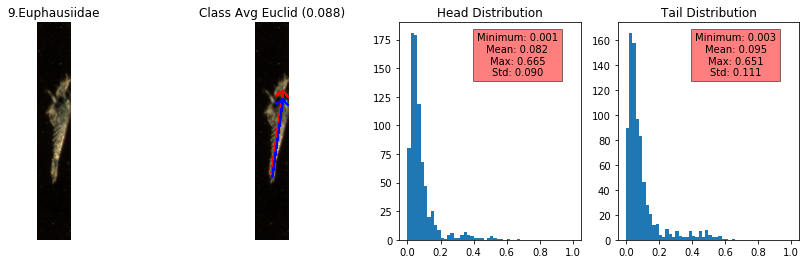

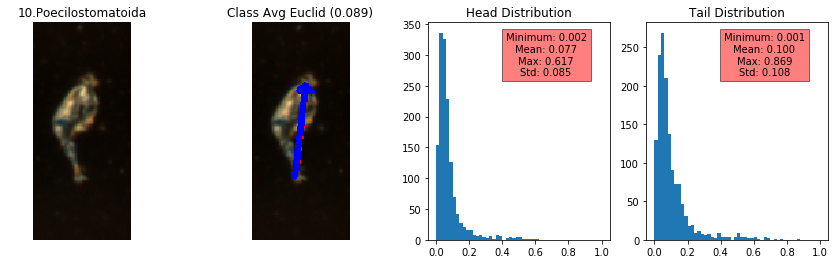

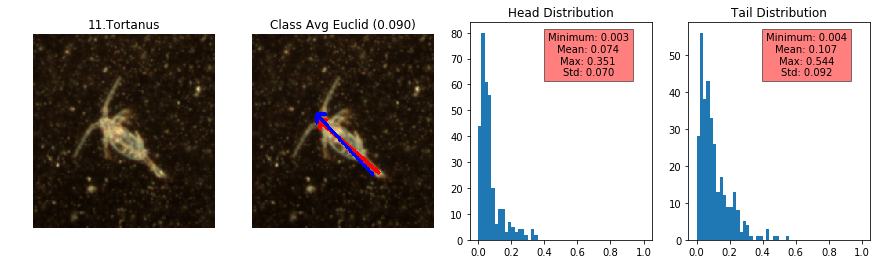

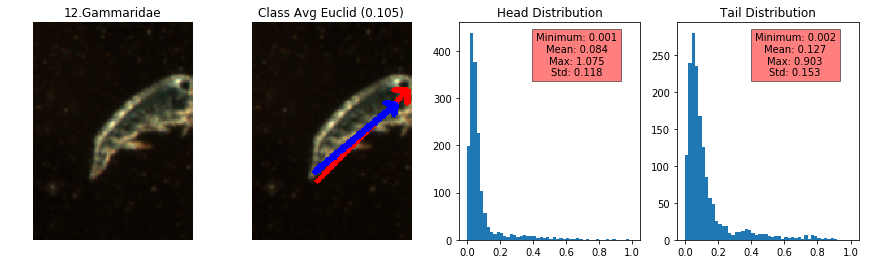

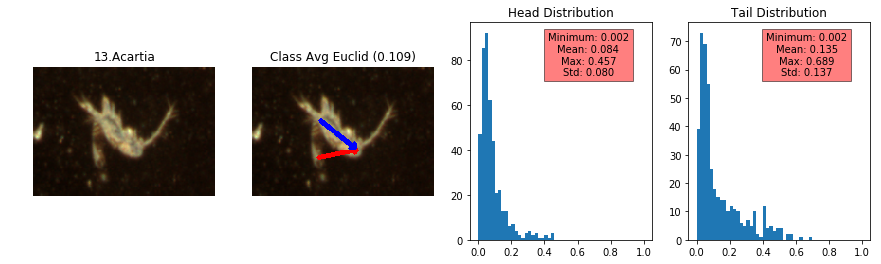

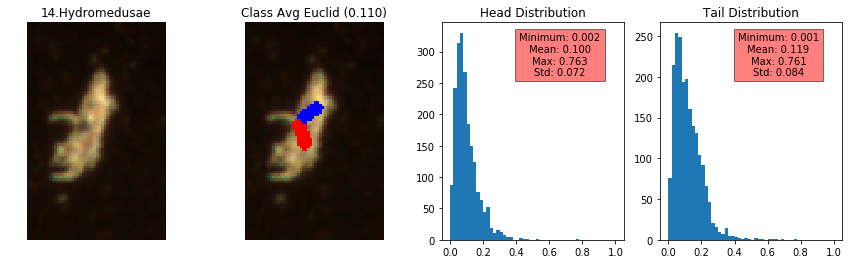

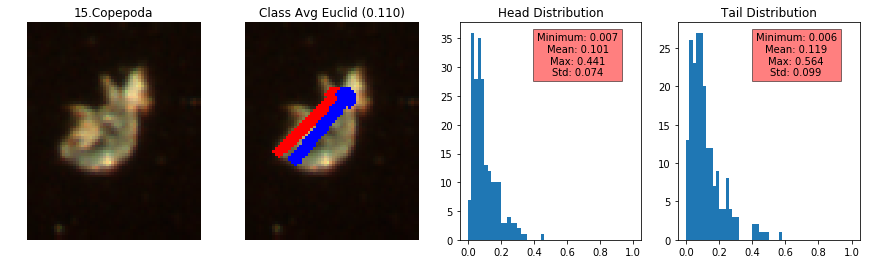

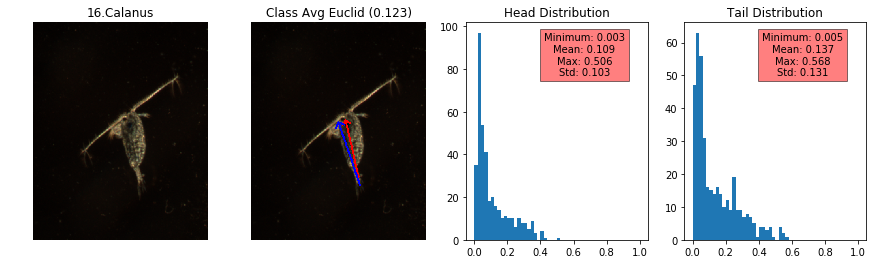

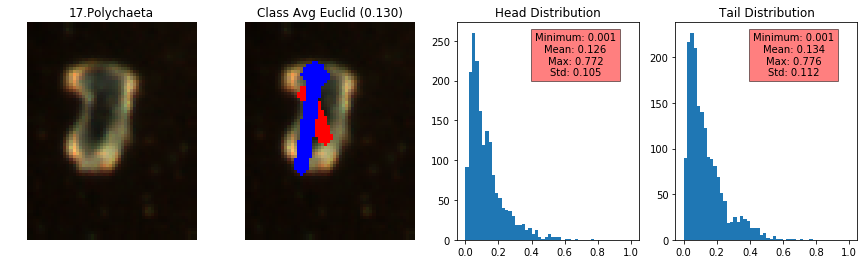

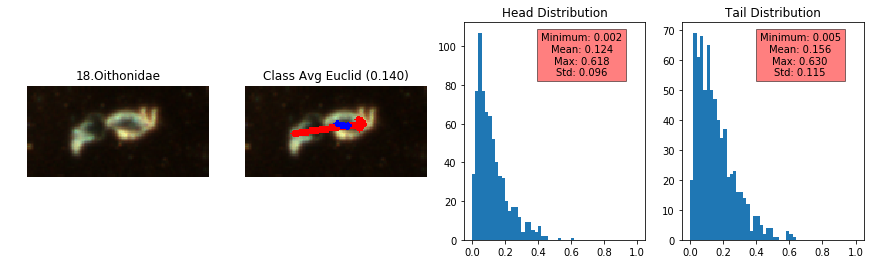

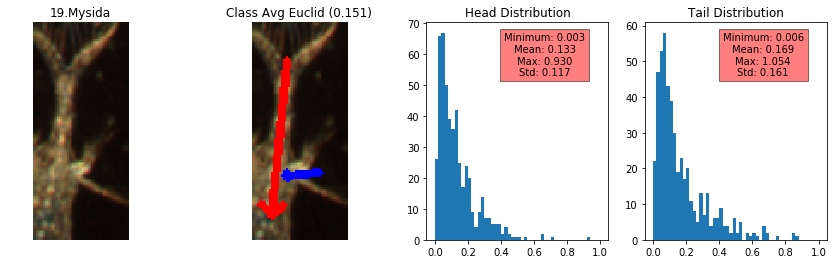

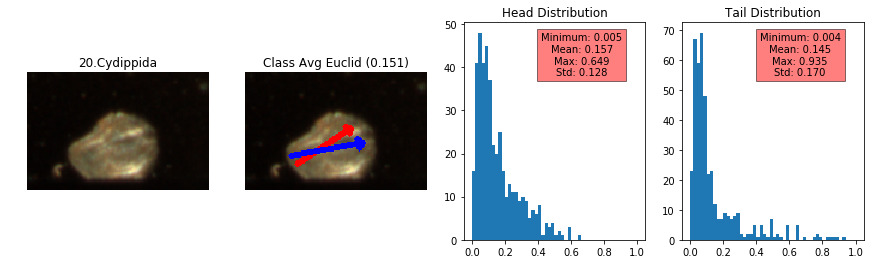

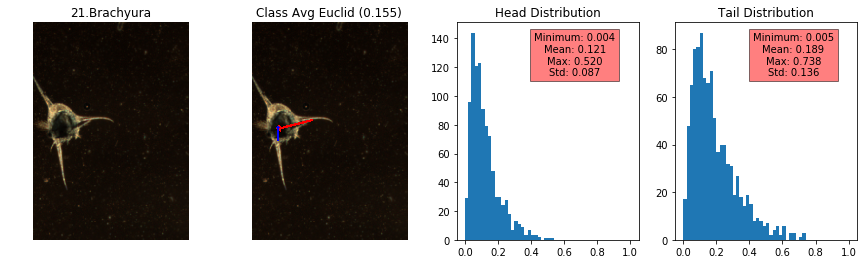

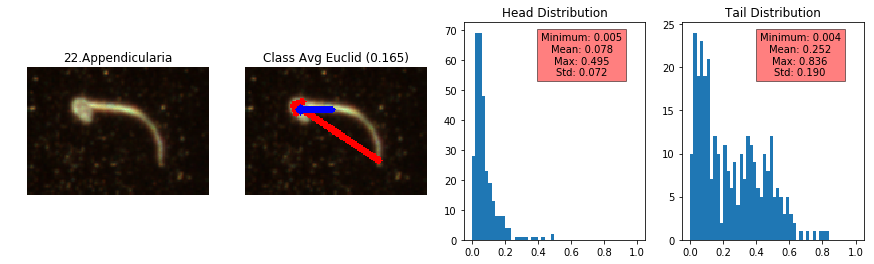

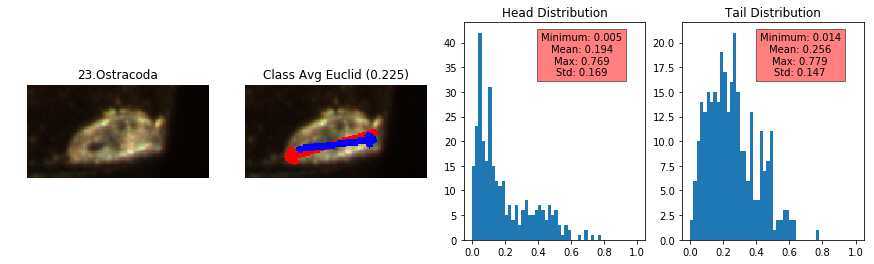

In [8]:
def plotEuclidDistribution(clsMetrics, clsMetIdx, dataset, predCoordinates):
    img_dir = '/data5/Plankton_wi18/rawcolor_db/images'
    numCols = 4
    histData = 3

    # Order classes
    classes = clsMetrics.keys()
    order = np.argsort([clsMetrics[cls]['Euclid']['Avg Distance'] for cls in classes])
    classes = [classes[i] for i in order]

    #plot Distributions
    for j,cls in enumerate(classes):
        fig, axarr = plt.subplots(1, numCols, figsize=(15,4))
        idx = clsMetIdx[cls][0] # image sample
        img = plt.imread(os.path.join(img_dir,dataset.data['images'][idx]))
        axarr[0].imshow(img)
        axarr[0].set_axis_off()
        axarr[0].set_title('{}.{}'.format(j+1, cls.split()[0]))
        
        headX, headY = dataset.data['head_x_rel'][idx], dataset.data['head_y_rel'][idx]
        tailX, tailY =  dataset.data['tail_x_rel'][idx], dataset.data['tail_y_rel'][idx]
        plotArrow(img, predCoordinates[idx], np.array([headX, headY, tailX, tailY]))
        axarr[1].imshow(img)
        axarr[1].set_axis_off()
        axarr[1].set_title('Class Avg Euclid ({:.03f})'.format(clsMetrics[cls]['Euclid']['Avg Distance']))
        for i,part in enumerate(clsMetrics[cls]['Euclid']['Distribution']):
            clsMin, clsMean, clsMax, clsStd = euclidStats(clsMetrics[cls]['Euclid']['Distribution'][part])
            axarr[i+2].hist(clsMetrics[cls]['Euclid']['Distribution'][part], 50, range=[0.0, 1.0])
            axarr[i+2].set_title(part)
            axarr[i+2].text(0.65,0.85, 'Minimum: {:0.3f}\nMean: {:0.3f}\nMax: {:0.3f}\nStd: {:0.3f}'.format(clsMin, clsMean, clsMax, clsStd), bbox=dict(facecolor='red', alpha=0.5),
                            horizontalalignment='center', verticalalignment='center', transform=axarr[i+2].transAxes)
    plt.show()
    
def plotArrow(image, predcoordinates, gtruthcoordinates):
    height, width = image.shape[:2]
    predhead = (int(predcoordinates[0,0] * width), int(predcoordinates[0,1]*height))
    predtail = (int(predcoordinates[1,0] * width), int(predcoordinates[1,1]*height))

    gtruthhead = (int(gtruthcoordinates[0] * width), int(gtruthcoordinates[1] * height))
    gtruthtail = (int(gtruthcoordinates[2] * width), int(gtruthcoordinates[3] * height))
    cv2.arrowedLine(image, gtruthtail, gtruthhead, (1., 0., 0.), 3) # gtruth
    cv2.arrowedLine (image, predtail, predhead, (0., 0., 1.), 3) # prediction

def euclidStats(histData):
    if not isinstance(histData, np.ndarray):
        histData = np.asarray(histData)
    return histData.min(), histData.mean(), histData.max(), np.std(histData)

plotEuclidDistribution(classMetrics, classMetrics_idx, datasets['test'], predCoordinates)

# Compare Pose Variability & KL Div with Pose Prediction

## Class by Class

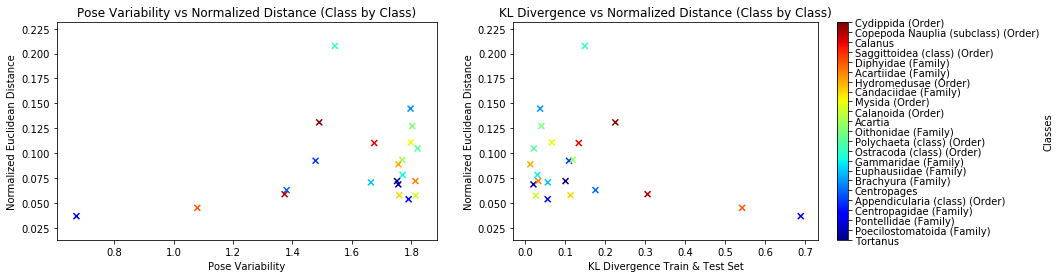

In [21]:
avgEuclid = [classMetrics[cls]['Euclid']['Avg Distance'] for cls in classMetrics]
poseVar = [classMetrics[cls]['PoseVar'] for cls in classMetrics]
kldiv = [classMetrics[cls]['KLDiv'] for cls in classMetrics]
label = [dummyLbl for dummyLbl, cls in enumerate(classMetrics)]

N = len(label)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,N,N+1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig, axarr = plt.subplots(1,2, figsize=(15,4))
scat = axarr[0].scatter(poseVar, avgEuclid, c=label, cmap=cmap, marker='x')
axarr[0].set_xlabel('Pose Variability'); axarr[0].set_ylabel('Normalized Euclidean Distance')
axarr[0].set_title('Pose Variability vs Normalized Distance (Class by Class)')

scat1 = axarr[1].scatter(kldiv, avgEuclid, c=label, marker='x', cmap=cmap)
axarr[1].set_xlabel('KL Divergence Train & Test Set'); axarr[1].set_ylabel('Normalized Euclidean Distance')
axarr[1].set_title('KL Divergence vs Normalized Distance (Class by Class)')
cb1 = plt.colorbar(scat1, spacing='proportional',ticks=bounds)
cb1.set_label('Classes')
cb1.set_ticklabels(classMetrics.keys())
plt.show()

## All specimens grouped by classes

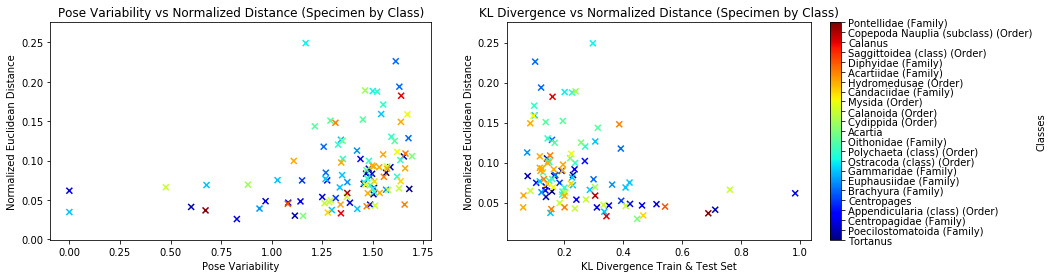

In [22]:
classMetrics, classMetrics_idx = {}, {}
lvl = 'Species'
for cls in testTaxLvlDatasets[lvl]:
    # Gather images of each class by their indices from dataset
    trainIdx = [i for i, spc in enumerate(trainspecimenIDs) if spc in trainTaxLvlDatasets[lvl][cls]]
    testIdx = [i for i, spc in enumerate(testspecimenIDs) if spc in testTaxLvlDatasets[lvl][cls]]

    # Compute metrics
    metrics = {}
    metrics['Euclid'] = euclideanDistance (predCoordinates[testIdx], gtruthHead[testIdx], gtruthTail[testIdx])
    metrics['PoseVar'] = pose_variability2(poseTrainSet[trainIdx], [trainspecimenIDs[i] for i in trainIdx])
    metrics['KLDiv'] = pose_diff2(poseTrainSet[trainIdx], [trainspecimenIDs[i] for i in trainIdx],
                                       poseTestSet[testIdx], [testspecimenIDs[i] for i in testIdx])
    classMetrics[cls] = metrics
    classMetrics_idx[cls] = testIdx
    
# organize speciesID by class and set them as a label
specimenIDs = classMetrics.keys()
planktonLbl = plankton_labels()
genus = [planktonLbl[spc][2] for spc in specimenIDs]
genusSet = {cls: {spc:classMetrics[spc] for spc in classMetrics if planktonLbl[spc][2] == cls} for cls in set(genus)}

avgEuclid = []; poseVar = []; label = []; kldiv = []
for dummyLbl,cls in enumerate(genusSet):
    avgEuclid += [genusSet[cls][spc]['Euclid']['Avg Distance'] for spc in genusSet[cls]]
    poseVar += [genusSet[cls][spc]['PoseVar'] for spc in genusSet[cls]]
    kldiv += [genusSet[cls][spc]['KLDiv'] for spc in genusSet[cls]]
    label += [dummyLbl for spc in genusSet[cls]]
    
N = len(label)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,N,N+1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig, axarr = plt.subplots(1,2, figsize=(15,4))
scat = axarr[0].scatter(poseVar, avgEuclid, c=label, cmap=cmap, marker='x')
axarr[0].set_xlabel('Pose Variability'); axarr[0].set_ylabel('Normalized Euclidean Distance')
axarr[0].set_title('Pose Variability vs Normalized Distance (Specimen by Class)')

scat1 = axarr[1].scatter(kldiv, avgEuclid, c=label, marker='x', cmap=cmap)
axarr[1].set_xlabel('KL Divergence Train & Test Set'); axarr[1].set_ylabel('Normalized Euclidean Distance')
axarr[1].set_title('KL Divergence vs Normalized Distance (Specimen by Class)')
cb1 = plt.colorbar(scat1, spacing='proportional',ticks=bounds)
cb1.set_label('Classes')
cb1.set_ticklabels(genusSet.keys())

plt.show()

## Classes by themselves

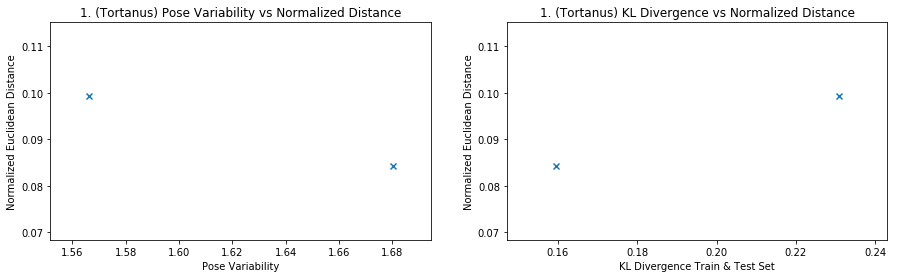

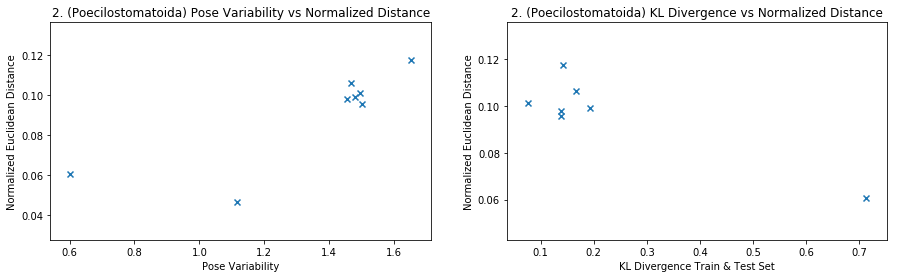

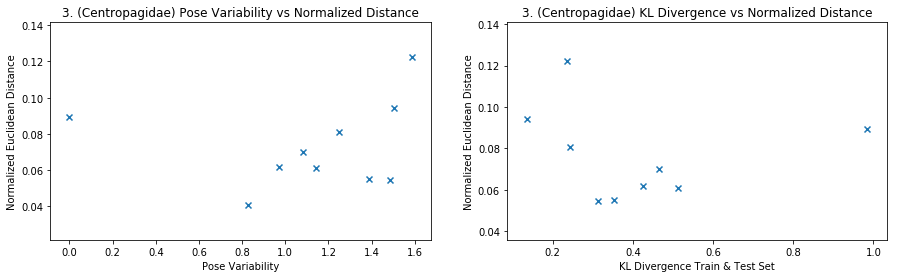

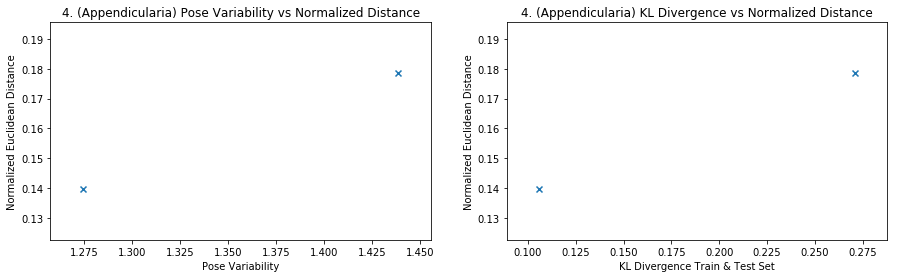

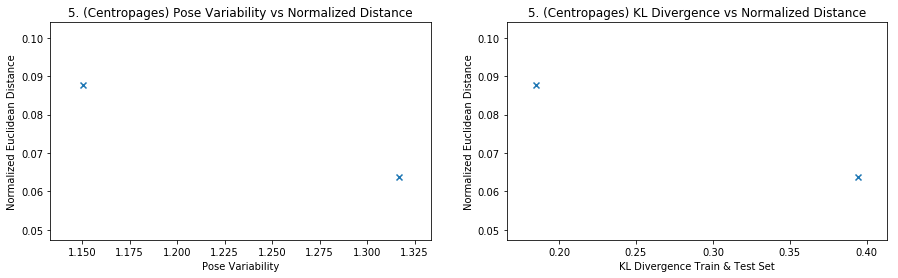

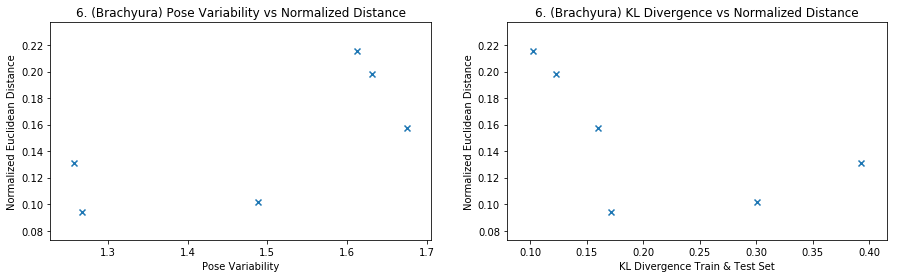

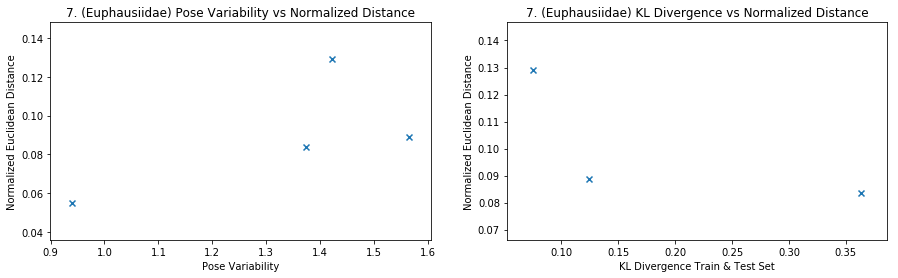

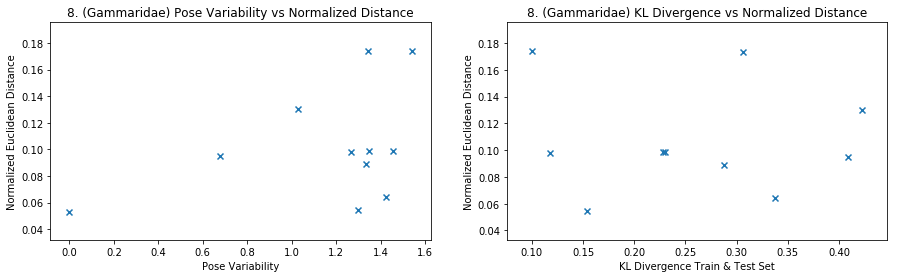

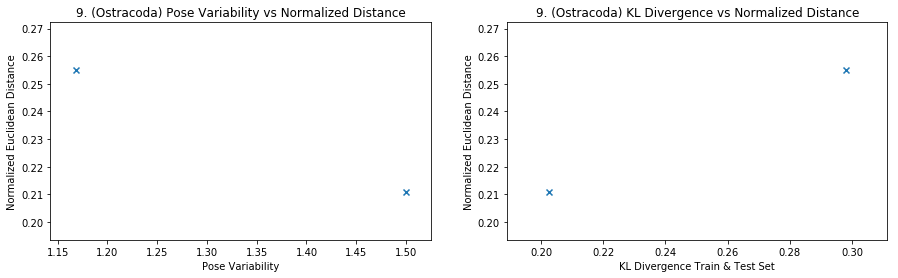

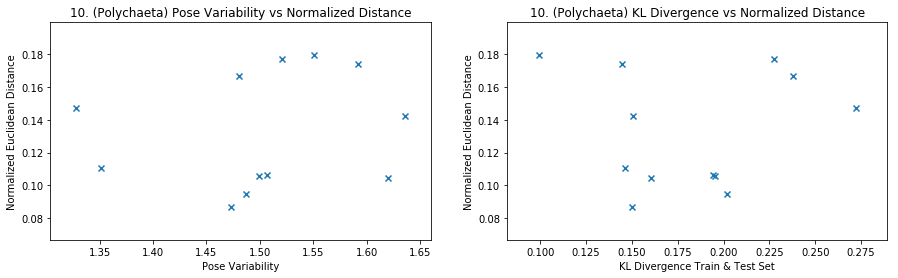

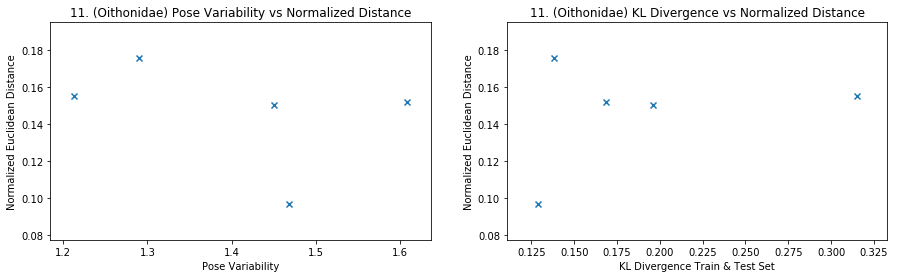

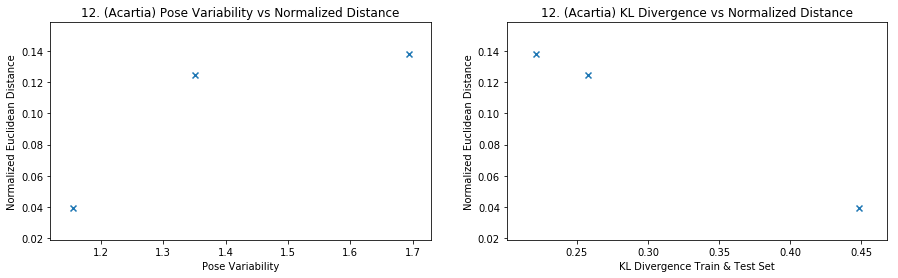

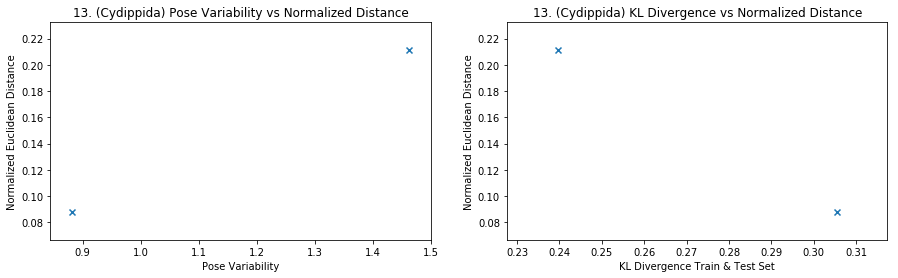

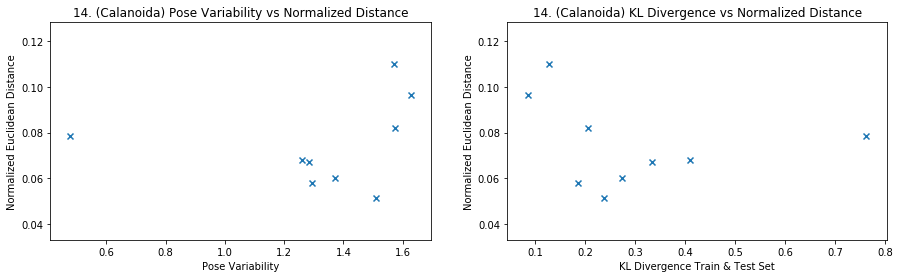

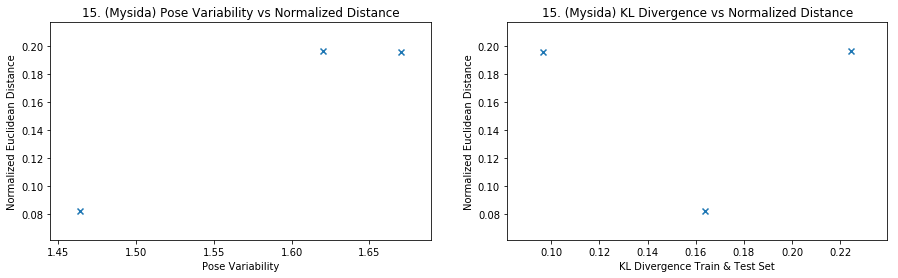

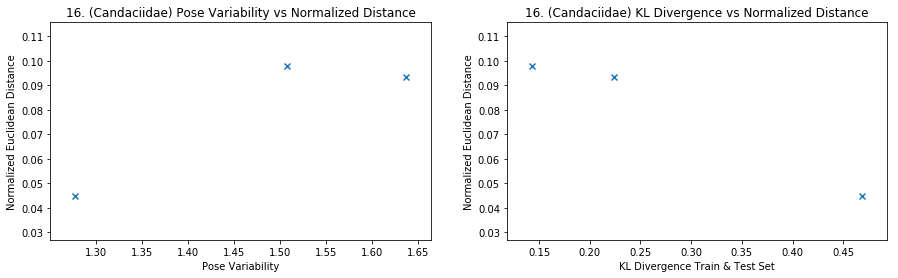

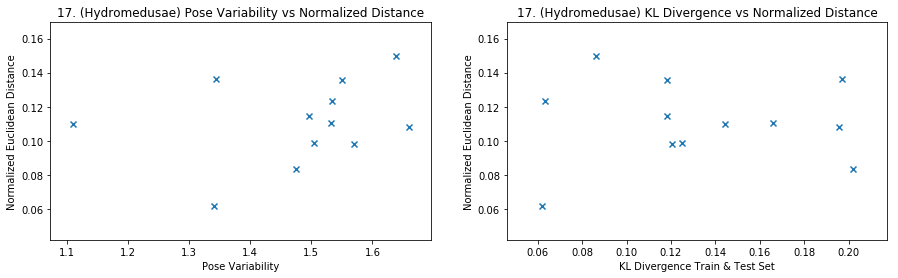

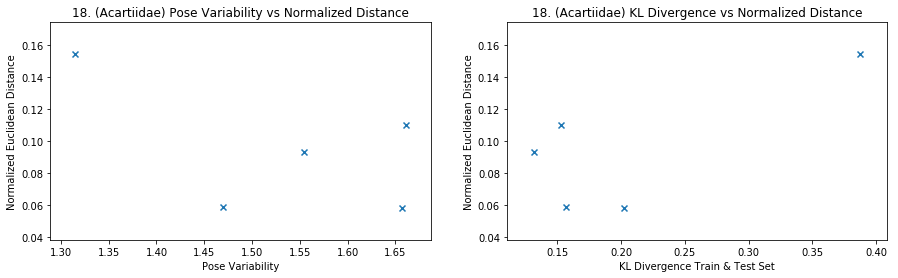

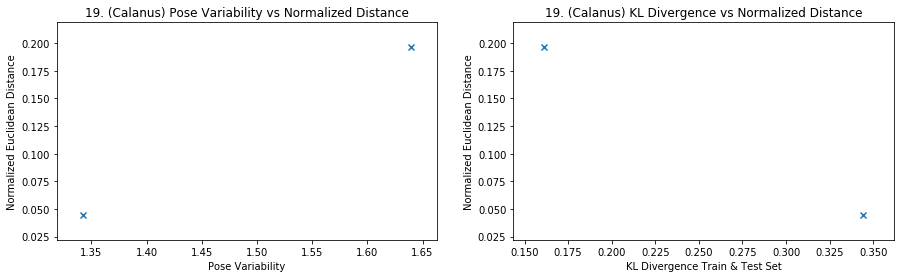

In [40]:
# organize speciesID by class and set them as a label
specimenIDs = classMetrics.keys()
planktonLbl = plankton_labels()
genus = [planktonLbl[spc][2] for spc in specimenIDs]
genusSet = {cls: {spc:classMetrics[spc] for spc in classMetrics if planktonLbl[spc][2] == cls} for cls in set(genus)}

ctr = 0
for cls in genusSet:
    avgEuclid = [genusSet[cls][spc]['Euclid']['Avg Distance'] for spc in genusSet[cls]]
    poseVar = [genusSet[cls][spc]['PoseVar'] for spc in genusSet[cls]]
    kldiv = [genusSet[cls][spc]['KLDiv'] for spc in genusSet[cls]]
    
    if len(poseVar) >=2 or len(kldiv) >=2 :
        fig, axarr = plt.subplots(1,2, figsize=(15,4))
        axarr[0].scatter(poseVar, avgEuclid, marker='x')
        axarr[0].set_xlabel('Pose Variability'); axarr[0].set_ylabel('Normalized Euclidean Distance')
        axarr[0].set_title('{}. ({}) Pose Variability vs Normalized Distance'.format(ctr+1, cls.split()[0]))

        axarr[1].scatter(kldiv, avgEuclid, marker='x')
        axarr[1].set_xlabel('KL Divergence Train & Test Set'); axarr[1].set_ylabel('Normalized Euclidean Distance')
        axarr[1].set_title('{}. ({}) KL Divergence vs Normalized Distance'.format(ctr+1, cls.split()[0]))
        ctr +=1
        plt.show()